In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

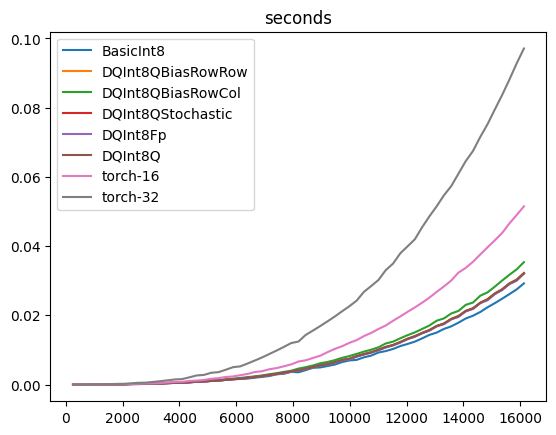

In [2]:
plt.figure()
plt.title("seconds")
for method in ["BasicInt8", "DQInt8QBiasRowRow", "DQInt8QBiasRowCol", "DQInt8QStochastic", "DQInt8Fp", "DQInt8Q", "torch-16", "torch-32"]:
# for method in ["DQInt8QSeparate_unroll1", "DQInt8QSeparate_unroll2", "DQInt8QSeparate_unroll3", "DQInt8QSeparate_unroll4", ]:
    result = np.load(f"../result/{method}/result.npy", allow_pickle=True)
    result = result.tolist()
    M_list = result["M_list"]
    avg_secs, avg_tflops = result[f"avg_{method.split('_')[0]}_secs"], result[f"avg_{method.split('_')[0]}_tflops"]

    plt.plot(M_list, avg_secs, label=method)

plt.legend()
plt.show()

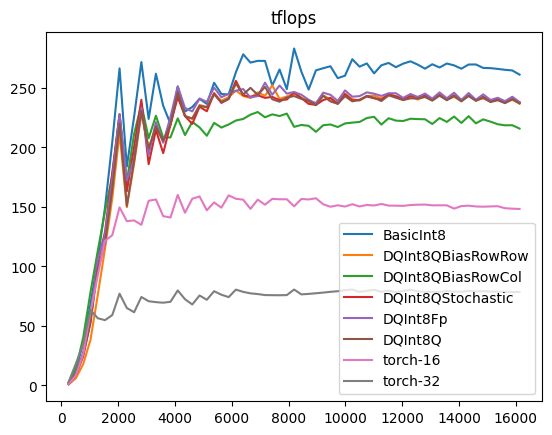

In [3]:
plt.figure()
plt.title("tflops")
for method in ["BasicInt8", "DQInt8QBiasRowRow", "DQInt8QBiasRowCol", "DQInt8QStochastic", "DQInt8Fp", "DQInt8Q", "torch-16", "torch-32"]:
# for method in ["DQInt8QSeparate_unroll1", "DQInt8QSeparate_unroll2", "DQInt8QSeparate_unroll3", "DQInt8QSeparate_unroll4", ]:
    result = np.load(f"../result/{method}/result.npy", allow_pickle=True)
    result = result.tolist()
    M_list = result["M_list"]
    avg_secs, avg_tflops = result[f"avg_{method.split('_')[0]}_secs"], result[f"avg_{method.split('_')[0]}_tflops"]

    plt.plot(M_list, avg_tflops, label=method)

plt.legend()
plt.show()

In [4]:
results = {}
for method in ["DQInt8Fp", "torch-16", "torch-32"]:
# for method in ["DQInt8QSeparate_unroll1", "DQInt8QSeparate_unroll2", "DQInt8QSeparate_unroll3", "DQInt8QSeparate_unroll4", ]:
    result = np.load(f"../result/{method}/result.npy", allow_pickle=True)
    result = result.tolist()
    M_list = result["M_list"]
    avg_secs, avg_tflops = result[f"avg_{method.split('_')[0]}_secs"], result[f"avg_{method.split('_')[0]}_tflops"]
    results[method] = np.array(avg_tflops)
print(M_list)
print(results["DQInt8Fp"] / results["torch-16"])


[  256   512   768  1024  1280  1536  1792  2048  2304  2560  2816  3072
  3328  3584  3840  4096  4352  4608  4864  5120  5376  5632  5888  6144
  6400  6656  6912  7168  7424  7680  7936  8192  8448  8704  8960  9216
  9472  9728  9984 10240 10496 10752 11008 11264 11520 11776 12032 12288
 12544 12800 13056 13312 13568 13824 14080 14336 14592 14848 15104 15360
 15616 15872 16128]
[1.2214673  1.2173913  1.0614225  0.93939394 1.1448184  1.0392157
 1.3728813  1.5223881  1.2491319  1.3694265  1.7294118  1.2482378
 1.4155405  1.4339153  1.5990051  1.5693159  1.6072351  1.4675909
 1.5182784  1.6186625  1.6274506  1.6215185  1.5341218  1.578726
 1.5957218  1.6309469  1.5576046  1.675362   1.5583937  1.6110849
 1.5675825  1.6383487  1.5594071  1.5358238  1.5065032  1.6164528
 1.6268198  1.5791318  1.6493335  1.5936149  1.6164242  1.6241986
 1.621454   1.5957457  1.6248022  1.6255367  1.6014369  1.6155932
 1.5957294  1.6138884  1.5928806  1.6268926  1.5945818  1.6556094
 1.5917004  1.6266742 

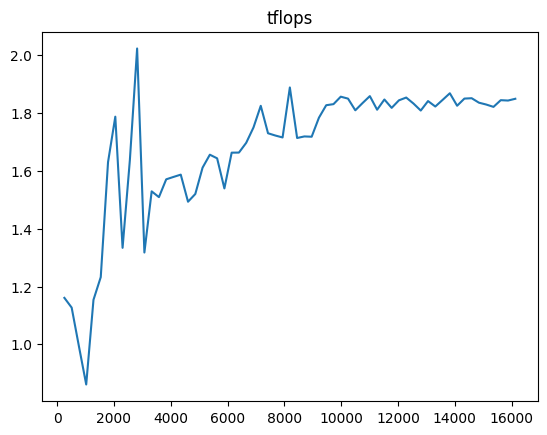

In [5]:
avg_secs = {}
avg_tflops = {}
plt.figure()
plt.title("tflops")
method1, method2 = "INT8V1", "torch-16"
for method in [method1, method2,]:
    result = np.load(f"../result/{method}/result.npy", allow_pickle=True)
    result = result.tolist()
    M_list = result["M_list"]
    avg_secs[method], avg_tflops[method] = result[f"avg_{method}_secs"], result[f"avg_{method}_tflops"]

plt.plot(M_list, np.array(avg_tflops[method1]) / np.array(avg_tflops[method2]), label=method)
plt.show()